In [1]:
# Install required libraries
!pip install yfinance ta tensorflow matplotlib scikit-learn ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a86e6f8fcbeec380cabf096382d07e53952d3fb90c977e85617f72ae83bd5b82
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2015-01-22 00:00:00+00:00  25.030840  28.100000  28.117500  27.430000   
2015-01-23 00:00:00+00:00  25.160006  28.245001  28.437500  27.882500   
2015-01-26 00:00:00+00:00  25.186722  28.275000  28.590000  28.200001   
2015-01-27 00:00:00+00:00  24.304863  27.285000  28.120001  27.257500   
2015-01-28 00:00:00+00:00  25.678879  28.827499  29.530001  28.827499   

Price                           Open     Volume    Return        RSI  \
Ticker                          AAPL       AAPL                        
Date                                                                   
2015-01-22 00:00:00+00:00  27.565001  215185600  0.026015  60.986498   
2015-01-23 00:00:00+00:00  28.075001  185859200  0.005160  62.490248   
2015-01-26 00:00:00+00:00  28.434999  222460000  0.0010

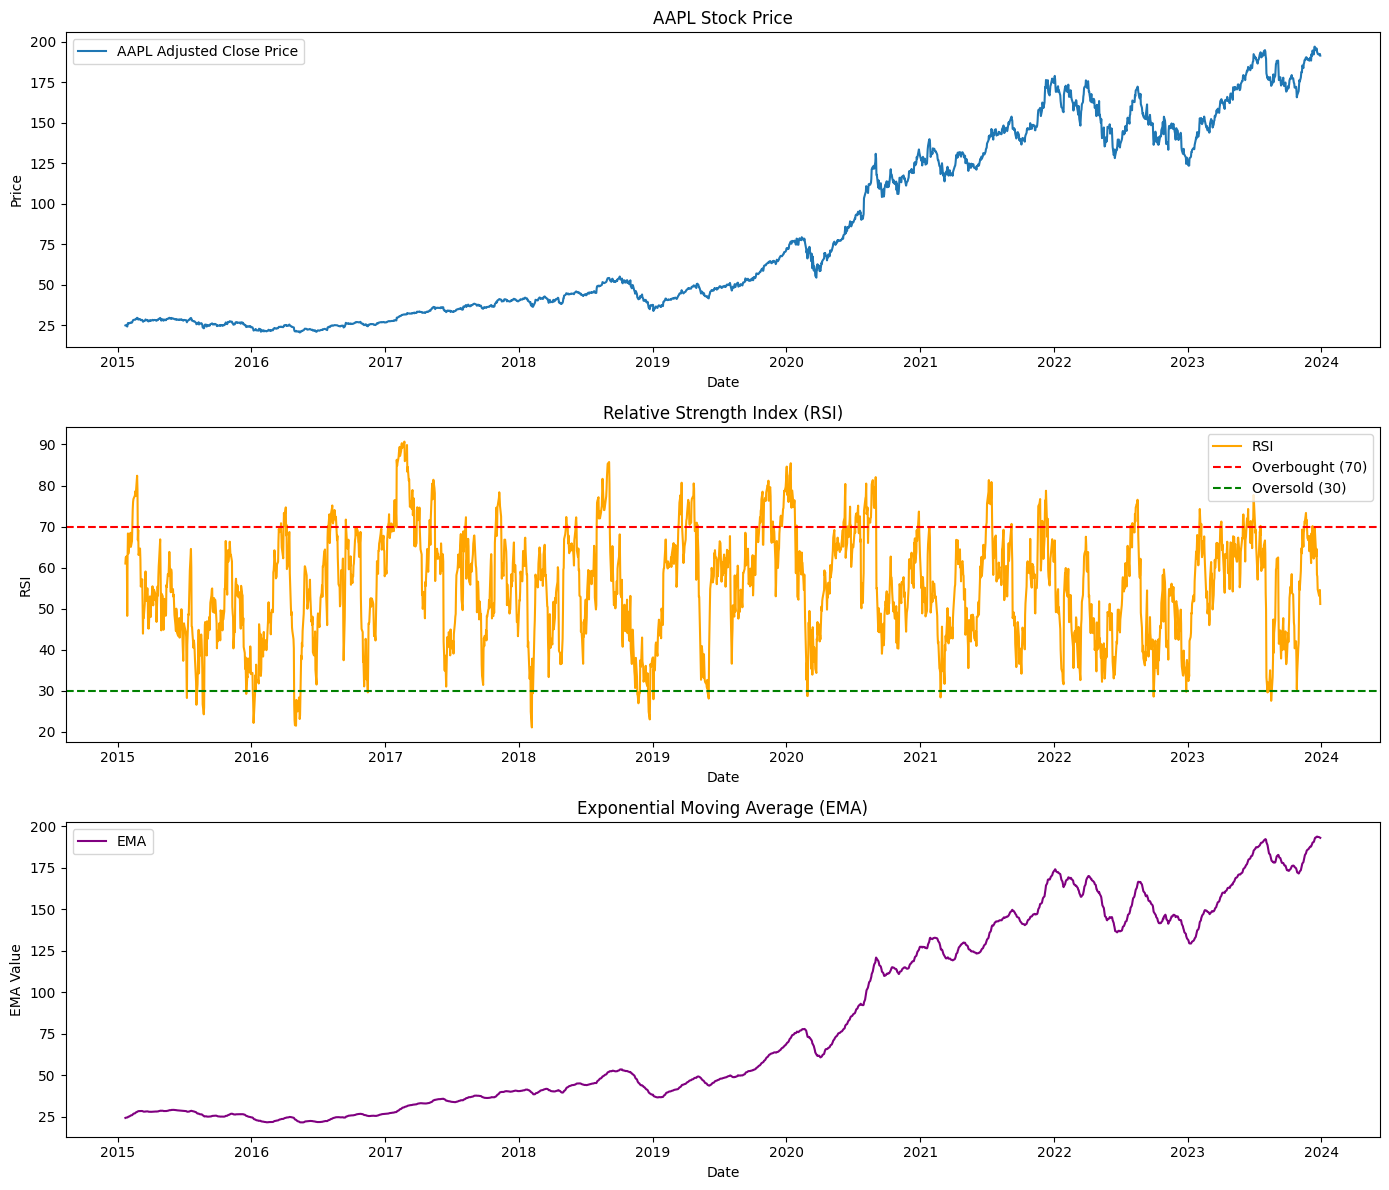

In [2]:
# Import Libraries
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the Stock Data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Return'] = data['Adj Close'].pct_change()
    data['RSI'] = ta.momentum.RSIIndicator(data['Adj Close'].squeeze()).rsi()
    data['EMA'] = ta.trend.EMAIndicator(data['Adj Close'].squeeze()).ema_indicator()
    data.dropna(inplace=True)
    return data

# User Inputs
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-12-31"

data = load_stock_data(stock_symbol, start_date, end_date)
print(data.head())

# Step 2: Plot the stock price, RSI, and EMA
plt.figure(figsize=(14, 12))

# Plot Adjusted Close Price
plt.subplot(3, 1, 1)
plt.plot(data['Adj Close'], label=f"{stock_symbol} Adjusted Close Price")
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(y=70, color='r', linestyle='--', label="Overbought (70)")
plt.axhline(y=30, color='g', linestyle='--', label="Oversold (30)")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()

# Plot EMA
plt.subplot(3, 1, 3)
plt.plot(data['EMA'], label='EMA', color='purple')
plt.title("Exponential Moving Average (EMA)")
plt.xlabel("Date")
plt.ylabel("EMA Value")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 14, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0560 - val_loss: 0.0058
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014 - val_loss: 9.6714e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss:

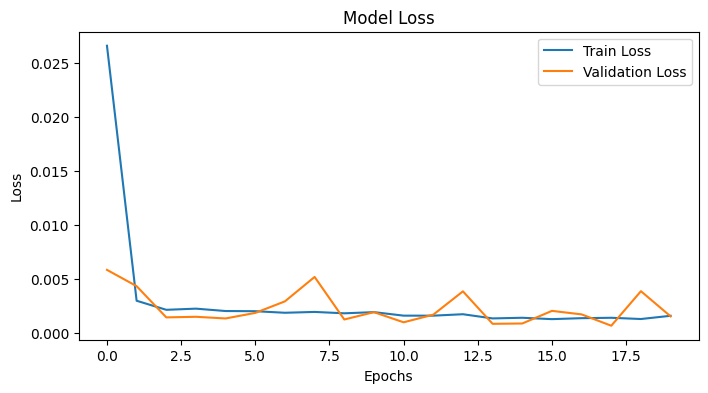

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


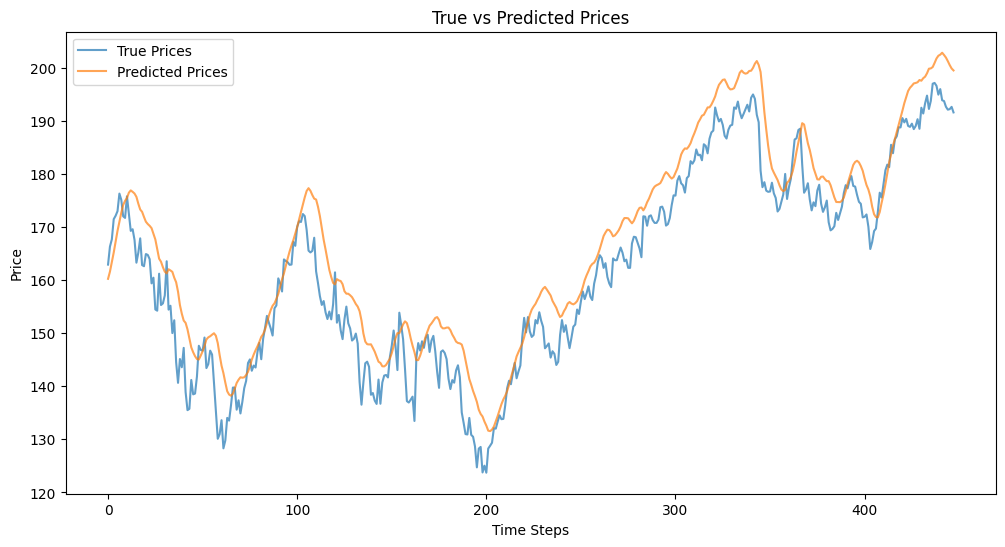

In [3]:
# Step 3: Prepare the Dataset
features = ['Adj Close', 'Volume', 'RSI', 'EMA']
lookback = 14  # Total number of days window choosen

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the first column: 'Adj Close'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 6: Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
def rescale(data, predictions):
    dummy_features = np.zeros((len(predictions), len(features) - 1))
    rescaled = scaler.inverse_transform(np.concatenate([predictions, dummy_features], axis=1))
    return rescaled[:, 0]

y_pred_rescaled = rescale(data[features], y_pred)
y_test_rescaled = rescale(data[features], y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True Prices", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted Prices", alpha=0.7)
plt.title("True vs Predicted Prices")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

In [5]:
# Step 7: Save the Model
model.save('lstm_stock_model.h5')
print("Model saved as lstm_stock_model - Apple stock price")

Model saved as lstm_stock_model - Apple stock price
